Esta é uma simples implementação do gradiente descendente para uma regressão linear com duas variáveis.

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# Criando um dataset de regressão
X, y, coeficients = make_regression(500, 1, noise=50, tail_strength=2, coef=True)
coeficients # Este é o coeficiente em que nosso gradiente deve se aproximar

array(37.47426062)

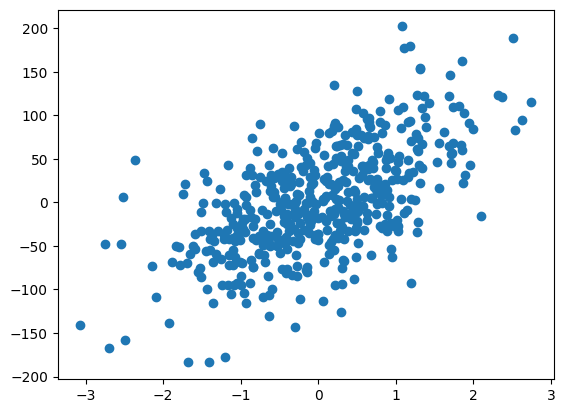

In [3]:
# Como os dados estão distribuídos
plt.scatter(X, y);

In [4]:
from sklearn.model_selection import train_test_split

def descent(X, y, learning_rate=0.02, iter=250):
  """Aqui acontece o gradiente descendente. Aplica-se o learning rate passado
  pela função e a quantidade de iterações que o gradiente irá executar."""
  B_0, B_1 = 1, 0 # Instancia os parâmetros da função linear
  n_samples = X.shape[0]
  n_iter = 1
  while n_iter <= iter:
    for xi, yi in zip(X.ravel(), y):
      step_size = learning_rate * np.sum((B_0 + B_1*xi - yi) * xi)/n_samples # Tamanho do "passo" que o gradiente irá tomar
      B_0 -= learning_rate * np.sum((B_0 + B_1*xi - yi))/n_samples # Derivada parcial de B0 é diferente de B1
      B_1 -= step_size
      print(f'B_0: {B_0}, B_1: {B_1}')
    n_iter += 1
  return B_0, B_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

B_0, B_1 = descent(X_train, y_train) # Calcula-se o gradiente nos dados gerados para obter os parâmetros B0 e B1

A saída de streaming foi truncada nas últimas 5000 linhas.
B_0: 1.4430613467246687, B_1: 38.97226857997493
B_0: 1.4452659273399975, B_1: 38.970168356157636
B_0: 1.4473765302950803, B_1: 38.969419867842504
B_0: 1.4523152003579392, B_1: 38.96789514763125
B_0: 1.452466851044582, B_1: 38.967850048920575
B_0: 1.4563495655656418, B_1: 38.96788719903713
B_0: 1.4586598054302327, B_1: 38.964390644399835
B_0: 1.4623282837238554, B_1: 38.962692030395964
B_0: 1.4615205589754277, B_1: 38.96288016824133
B_0: 1.4633113548662584, B_1: 38.961772597355704
B_0: 1.459160576492397, B_1: 38.964417731581776
B_0: 1.4585466703198593, B_1: 38.96383401142628
B_0: 1.4557160583518203, B_1: 38.96072039706071
B_0: 1.456434490631073, B_1: 38.96211925468777
B_0: 1.4560863505017434, B_1: 38.961478155939474
B_0: 1.4556326375991036, B_1: 38.96150422044452
B_0: 1.453073915016945, B_1: 38.96448821821854
B_0: 1.4584365645262163, B_1: 38.9671656783658
B_0: 1.4568457736732432, B_1: 38.96647632184473
B_0: 1.4536663415747206, B

In [5]:
def reg_linear(X, B_0, B_1):
  """Função que modela a função linear com os parâmetros obtidos com o gradiente"""
  y_pred = []
  for xi in X:
    fx = B_0 + B_1*xi
    y_pred.append(fx)
  return np.array(y_pred)

y_pred = reg_linear(X_test, B_0, B_1)

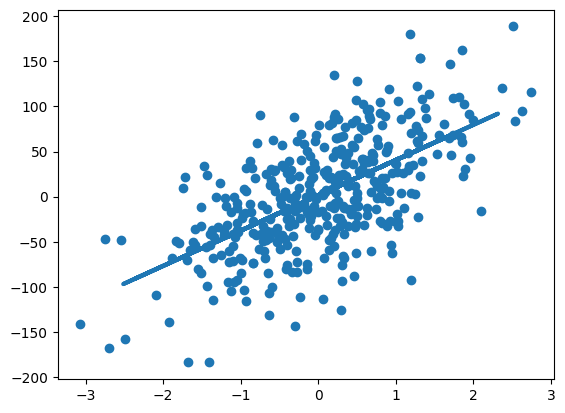

In [6]:
# Reta ajustada aos dados gerados!
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, linewidth=3);

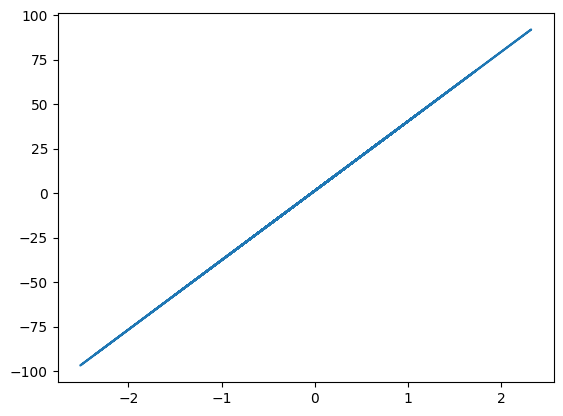

In [7]:
plt.plot(X_test, y_pred);